In [1]:
import numpy as np
%cd ..
from src import graph_building


d:\FJFI\KAIST\Courses\Graph Machine Learning and Mining\GMLFinalProject


In [2]:
data = np.array([[3,-1],
                 [4,0],
                 [5,-2],
                 [4,6],
                 [5,7],
                 [5.5,6]])

In [3]:
dist = graph_building.distances(data)
# dist

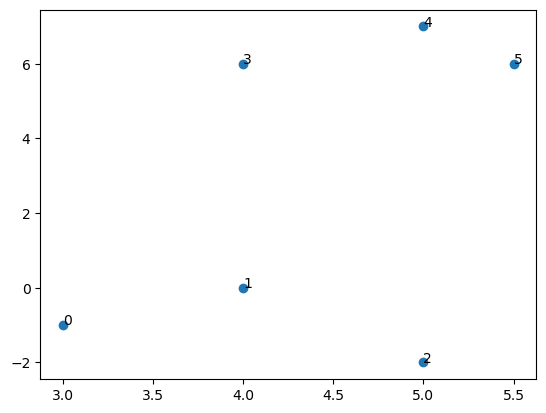

In [4]:
import matplotlib.pyplot as plt

# draw datapoints
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
for i in range(data.shape[0]):
    ax.annotate(i, (data[i, 0], data[i, 1]))

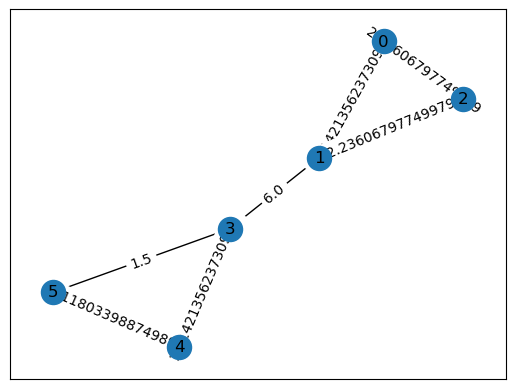

In [6]:
import networkx as nx

graph = graph_building.build_graph(dist)

layout = nx.spring_layout(graph)

nx.draw_networkx(graph, pos=layout, with_labels=True)
labels= nx.get_edge_attributes(graph, 'weight')
_ = nx.draw_networkx_edge_labels(graph, pos=layout, edge_labels=labels)

In [7]:
import networkx as nx
from node2vec import Node2Vec


c:\Users\david\anaconda3\envs\graphs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
node2vec = Node2Vec(graph, dimensions=2, walk_length=5, num_walks=100, workers=1)

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 485.41it/s]


In [42]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)


In [43]:
model_keys = model.wv.key_to_index
model_keys = sorted([w for w in model_keys])
wv_dict = {key: wv for key, wv in zip(model_keys, model.wv[model_keys])}

C:\Users\david\AppData\Local\Temp\ipykernel_17696\135291149.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x = np.vstack(wv_dict.values())[:,0]
C:\Users\david\AppData\Local\Temp\ipykernel_17696\135291149.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y = np.vstack(wv_dict.values())[:,1]


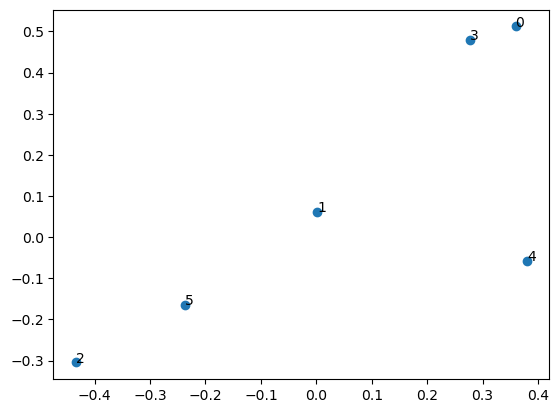

In [44]:
fig, ax = plt.subplots()
x = np.vstack(wv_dict.values())[:,0]
y = np.vstack(wv_dict.values())[:,1]
ax.scatter(x,y)
for key in model_keys:
    ax.annotate(key, (wv_dict[key][0], wv_dict[key][1]))

In [37]:
np.vstack(wv_dict.values())

C:\Users\david\AppData\Local\Temp\ipykernel_17696\1029365219.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.vstack(wv_dict.values())


array([[-0.46513742, -0.35580865],
       [-0.02680904,  0.01182108],
       [ 0.32294363,  0.4486494 ],
       [ 0.25517786,  0.4504825 ],
       [-0.2507714 , -0.18816859],
       [ 0.3690157 , -0.07669321]], dtype=float32)

In [38]:
wv_dict.values()

dict_values([array([-0.46513742, -0.35580865], dtype=float32), array([-0.02680904,  0.01182108], dtype=float32), array([0.32294363, 0.4486494 ], dtype=float32), array([0.25517786, 0.4504825 ], dtype=float32), array([-0.2507714 , -0.18816859], dtype=float32), array([ 0.3690157 , -0.07669321], dtype=float32)])